**Exercice 1**
On place des croix rouges aux sommets. On utiliser le fonction **zip()** quie pemet de parcourir deux listes à la fois. On évite de tracer le premier sommet deux fois... 


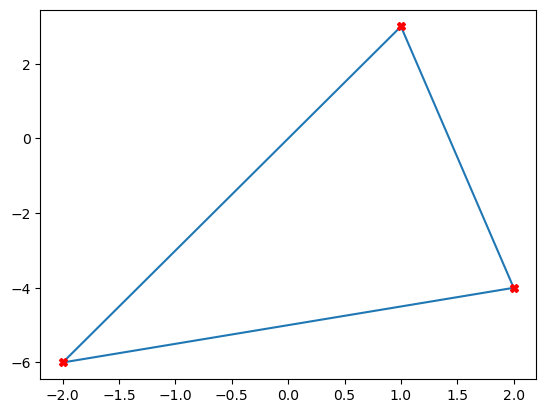

In [9]:
import matplotlib.pyplot as plt

x, y = [-2,2,1,-2], [-6,-4,3,-6]
plt.plot(x, y)
for xe, ye in zip(x[:-1],y[:-1]):
 plt.plot(xe, ye, 'rX')
   

**Exercice 3**
Le cercle de rayon $r$ est donné par
$$
x = r\cos(\theta),\quad y = r\sin(\theta),\quad \theta\in[0,2\pi[.
$$
Il s'agit donc de couper l'intervalle $[0,2\pi[$ en $n-1$ sous-intervalles.

In [10]:
import matplotlib.pyplot as plt
import math

n = 6
delta = 2*math.pi/n
t = [i*delta for i in range(n)]
print(f"{t=}")

t=[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982988]


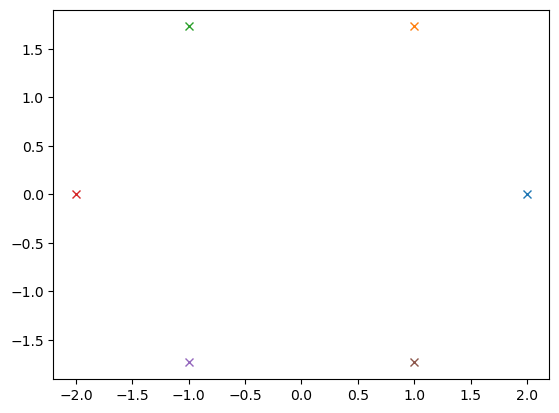

In [17]:
r = 2
x, y = [r*math.cos(te) for te in t], [r*math.sin(te) for te in t]
for xe, ye in zip(x,y):
    plt.plot(xe, ye, 'x')
plt.show()

On rajoute une légende pour les sommets.

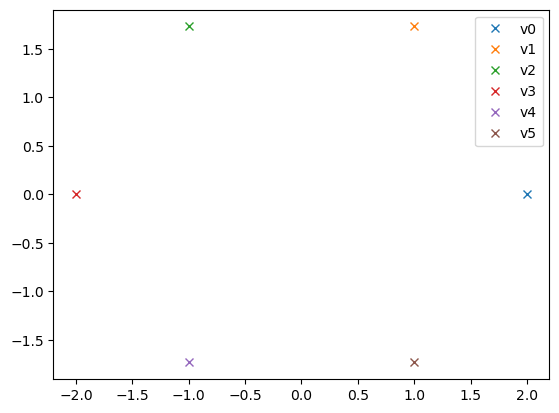

In [18]:
for i, (xe, ye) in enumerate(zip(x,y)):
    plt.plot(xe, ye, 'x', label='v'+str(i))
plt.legend()
plt.show()

Alors la fonction finale sera :

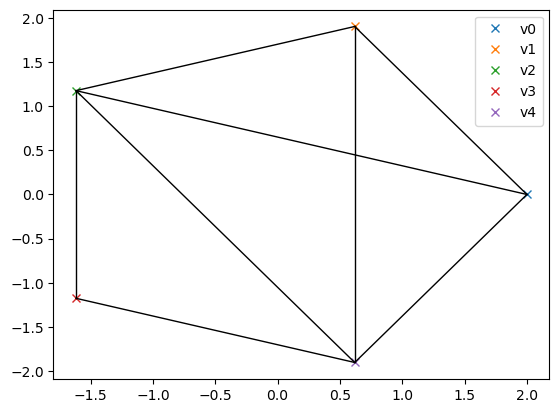

In [27]:
import math

def visu_graphs_cercle(G, r=2):
    n, E = G
    delta = 2*math.pi/n
    t = [i*delta for i in range(n)]
    x, y = [r*math.cos(te) for te in t], [r*math.sin(te) for te in t]
    for i, (xe, ye) in enumerate(zip(x,y)):
        plt.plot(xe, ye, 'x', label='v'+str(i))
    for e in E:
        xe, ye = [x[e[0]], x[e[1]]], [y[e[0]], y[e[1]]]
        plt.plot(xe, ye, 'k', lw=1)
    plt.legend()
    plt.show()

# pour tester
if __name__ == "__main__":
    import graphes
    G = graphes.graphe_cours()
    visu_graphs_cercle(G)

**Exercice 4**
On génère la marche aléatoire avec la fonction écrite auparavent. 
Pour la visualiser, les ordonnées ('y') sont nos 'x' et les abcisses ('x') sont les indices. Ce n'est pas la peine de les générer (on pourrait faire avec *range(len(x)))*) car *pl.plot()* les génère automatiquement si on ne deonne que les ordonnées. 

x=[0, -1, 0, 1, 0, -1, 0, -1, 0, -1, -2, -3, -2, -3, -2, -3, -4, -5, -4, -3, -4, -3, -2, -3, -2, -3, -2, -3, -2, -1, -2, -3, -4, -5, -6, -7, -6, -7, -8, -7, -6, -7, -8, -9, -8, -7, -6, -5, -4, -3, -4, -5, -4, -5, -4, -5, -4, -5, -6, -5, -6, -7, -6, -7, -8, -7, -8, -7, -8, -9, -8, -7, -8, -9, -8, -9, -10, -9, -10, -9, -8, -7, -8, -7, -8, -9, -8, -7, -8, -7, -8, -7, -6, -7, -6, -7, -6, -7, -6, -7, -8]


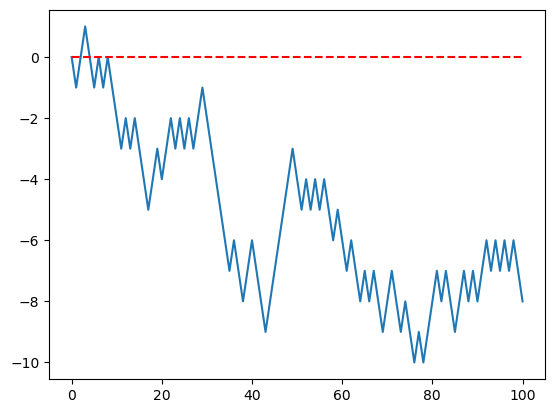

In [66]:
import matplotlib.pyplot as plt
import marche_alea

n = 100
x = marche_alea.marche(n)
print(f"{x=}")
plt.plot(x)
plt.plot([0,n],[0,0], '--r')

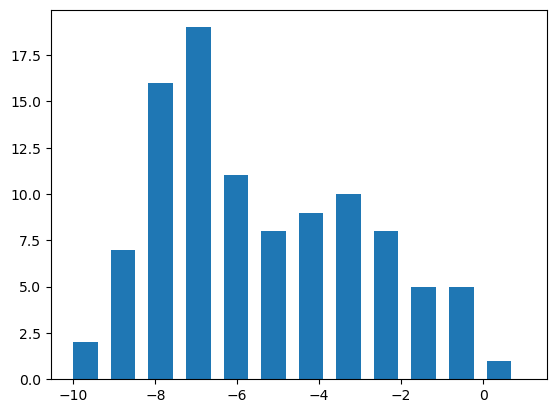

In [67]:
import numpy as np

f, _, _ = plt.hist(x, bins=max(x)-min(x)+1, width=0.6)

Pour la moyenne on a 
$$
E(x) = \sum_{k=-n}^{k=n} k \frac{{\rm card}(\{i \vert x_i=k\})}{n} 
$$
Pour la variance on peut se rappeller de la formule
$$
V(x) = E(x^2) - E(x)^2
$$

In [69]:
k = range(min(x), max(x)+1)
E, V = 0, 0
for i in range(len(f)):
    E += k[i]*f[i]
    V += k[i]**2*f[i]
E /= sum(f)
V /= sum(f)
V -= E**2
print(f"{E=} {V=}")


E=np.float64(-5.306930693069307) V=np.float64(7.3810410744044646)


On remarque la sortie un peu bizarre : les deux valurs de $E$ et de $V$ sont des floats de **numpy**.

Nous verrons qu'en utilisant un peu plus **numpy**, on peut écrire ces derniers calcul bien plus facilement.


On peut maintenant tout raseembler dans une fonction (que l'on mettra dans 'marche_alea.py'), qui affiche la marche, l'histogramme et espérance et variance...